## Table of Content

1. Importing Packages 
2. data loading 
3. data cleaning 
4. install packages and import packages for use 
5. Plotting the correlation heatmap
6. Plotting the top countries with highest average temperature
7. Plotting pie chart of population distribution in rural vs urban
8.  Load data for plotting LinearRegression, PolynomialFeatures , train_test_split

## Project introduction

This project examines the impact of climate change on rural and urban populations within the agri-food sector. Using data on CO₂ emissions, temperature variations, and population distribution, this analysis provides insights into areas most affected by climate change and supports sustainable development strategies for stakeholders, including policymakers and agricultural businesses. By understanding the differences in impact between rural and urban areas, this project aims to guide strategic decisions that foster climate resilience and sustainable agricultural practices.

## Importing packages 

In [5]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt  
import seaborn as sns
       
from sklearn.linear_model import LinearRegression       
from sklearn.ensemble import RandomForestRegressor      
from sklearn.tree import DecisionTreeRegressor  
from sklearn.svm import SVR                         

from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split    


# Loading data 

In [40]:
import pandas as pd

file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri.csv"
data = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
data.head()


,Area,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fertilizers Manufacturing,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,11.9970,1590.5319,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,12.8539,1657.2364,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,13.4929,1653.5068,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,14.0559,1642.9623,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,15.1269,1689.3593,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


# Data cleaning


In [19]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri.csv"
data = pd.read_csv(file_path)

# Display the first few rows and column info to understand the structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
Area                               6965 non-null object
Year                               6965 non-null int64
Savanna fires                      6934 non-null float64
Forest fires                       6872 non-null float64
Crop Residues                      5576 non-null float64
Rice Cultivation                   6965 non-null float64
Drained organic soils (CO2)        6965 non-null float64
Pesticides Manufacturing           6965 non-null float64
Food Transport                     6965 non-null float64
Forestland                         6472 non-null float64
Net Forest conversion              6472 non-null float64
Food Household Consumption         6492 non-null float64
Food Retail                        6965 non-null float64
On-farm Electricity Use            6965 non-null float64
Food Packaging                     6965 non-null float64
Agrifood Systems Waste Disposal    6965 n

(          Area  Year  Savanna fires  Forest fires  Crop Residues  \
 0  Afghanistan  1990        14.7237        0.0557       205.6077   
 1  Afghanistan  1991        14.7237        0.0557       209.4971   
 2  Afghanistan  1992        14.7237        0.0557       196.5341   
 3  Afghanistan  1993        14.7237        0.0557       230.8175   
 4  Afghanistan  1994        14.7237        0.0557       242.0494   
 
    Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
 0            686.00                          0.0                 11.807483   
 1            678.16                          0.0                 11.712073   
 2            686.00                          0.0                 11.712073   
 3            686.00                          0.0                 11.712073   
 4            705.60                          0.0                 11.712073   
 
    Food Transport  Forestland           ...            Manure Management  \
 0         63.1152   -2388.803 

 ### Reload and clean the dataset in one step to ensure data_cleaned is defined

In [22]:
# Reload and clean the dataset in one step to ensure data_cleaned is defined
data = pd.read_csv(file_path)

# Step 1: Check for Null Values and clean
null_counts = data.isnull().sum()
columns_to_drop = null_counts[null_counts > 500].index  # Drop columns with more than 500 null values
data_cleaned = data.drop(columns=columns_to_drop).fillna(data.mean())  # Fill remaining null values with mean

# Step 2: Remove Duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Step 3: Apply Filters

# Filter for total emissions greater than a threshold (assuming 'total_emission' is a column)
if 'total_emission' in data_cleaned.columns:
    filtered_data = data_cleaned[data_cleaned['total_emission'] > 2000]
else:
    filtered_data = None  # Placeholder if the column doesn't exist

# Filter for rows where 'Area' is 'Africa' (assuming 'area' is a column)
if 'area' in data_cleaned.columns:
    filtered_data_region = data_cleaned[data_cleaned['area'].str.lower() == 'africa']
else:
    filtered_data_region = None  # Placeholder if the column doesn't exist

# Display results
data_cleaned.info(), filtered_data.head() if filtered_data is not None else "No 'total_emission' column", \
filtered_data_region.head() if filtered_data_region is not None else "No 'area' column"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 0 to 6964
Data columns (total 26 columns):
Area                               6965 non-null object
Year                               6965 non-null int64
Savanna fires                      6965 non-null float64
Forest fires                       6965 non-null float64
Rice Cultivation                   6965 non-null float64
Drained organic soils (CO2)        6965 non-null float64
Pesticides Manufacturing           6965 non-null float64
Food Transport                     6965 non-null float64
Forestland                         6965 non-null float64
Net Forest conversion              6965 non-null float64
Food Household Consumption         6965 non-null float64
Food Retail                        6965 non-null float64
On-farm Electricity Use            6965 non-null float64
Food Packaging                     6965 non-null float64
Agrifood Systems Waste Disposal    6965 non-null float64
Food Processing                    6965 n

(None,           Area  Year  Savanna fires  Forest fires  Rice Cultivation  \
 0  Afghanistan  1990        14.7237        0.0557            686.00   
 1  Afghanistan  1991        14.7237        0.0557            678.16   
 2  Afghanistan  1992        14.7237        0.0557            686.00   
 3  Afghanistan  1993        14.7237        0.0557            686.00   
 4  Afghanistan  1994        14.7237        0.0557            705.60   
 
    Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
 0                          0.0                 11.807483         63.1152   
 1                          0.0                 11.712073         61.2125   
 2                          0.0                 11.712073         53.3170   
 3                          0.0                 11.712073         54.3617   
 4                          0.0                 11.712073         53.9874   
 
    Forestland  Net Forest conversion           ...            \
 0   -2388.803                 

#### Final verification of the dataset cleanliness

In [27]:
# Final verification of the dataset cleanliness

# Check for any remaining null values
null_counts_after_cleaning = data_cleaned.isnull().sum()

# Check data types to ensure they are appropriate
data_types = data_cleaned.dtypes

# Display the results
null_counts_after_cleaning, data_types


(Area                               0
 Year                               0
 Savanna fires                      0
 Forest fires                       0
 Rice Cultivation                   0
 Drained organic soils (CO2)        0
 Pesticides Manufacturing           0
 Food Transport                     0
 Forestland                         0
 Net Forest conversion              0
 Food Household Consumption         0
 Food Retail                        0
 On-farm Electricity Use            0
 Food Packaging                     0
 Agrifood Systems Waste Disposal    0
 Food Processing                    0
 Fertilizers Manufacturing          0
 Manure left on Pasture             0
 Fires in organic soils             0
 Fires in humid tropical forests    0
 Rural population                   0
 Urban population                   0
 Total Population - Male            0
 Total Population - Female          0
 total_emission                     0
 Average Temperature °C             0
 dtype: int6

In [30]:
# Save the cleaned dataset to a new CSV file
data_cleaned.to_csv('co2_emissions_from_agri_cleaned.csv', index=False)


### Install Packages

In [33]:
# Install matplotlib for basic plotting
!pip install matplotlib

# Install seaborn for statistical data visualization
!pip install seaborn

# Install plotly for interactive plots (optional)
!pip install plotly


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### Import Packages for Use

In [34]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns            # For enhanced statistical plots
import plotly.express as px      # For interactive plotting (optional)


# Plotting the correlation heatmap

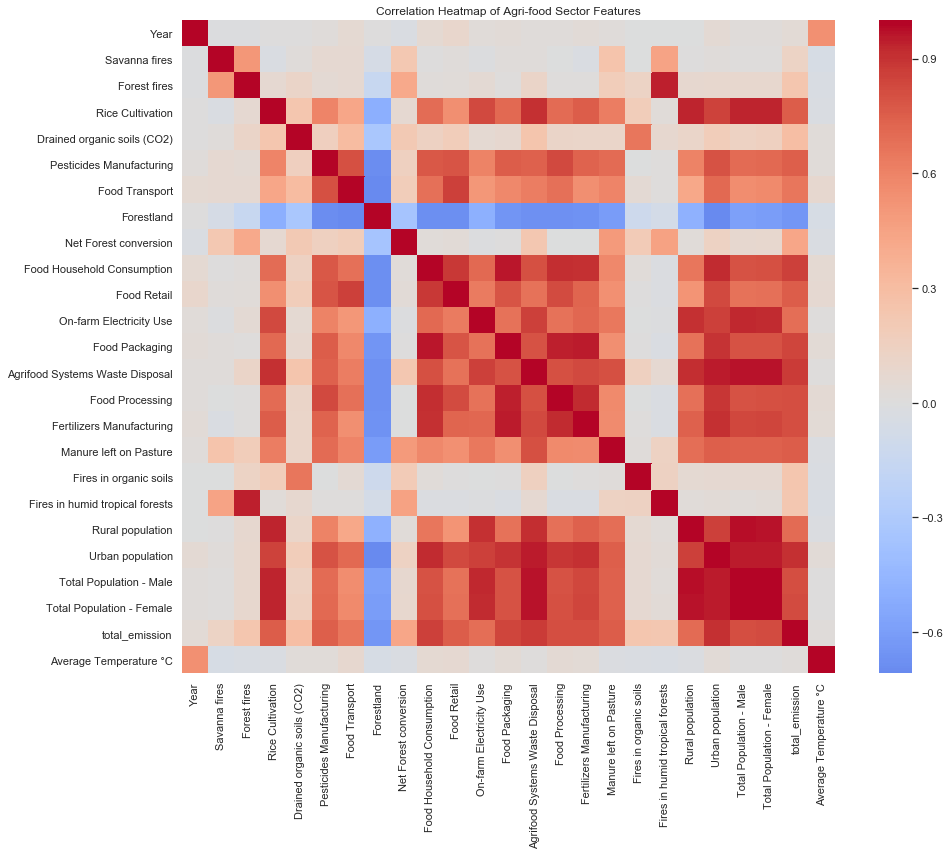

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style for better visuals
sns.set(style="whitegrid")

# Plotting the correlation heatmap to identify important features that may influence average temperature
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True, square=True, center=0)
plt.title("Correlation Heatmap of Agri-food Sector Features")
plt.show()


The correlation heatmap shows the relationships among the various features, with a particular focus on how they might relate to average temperature.

In [44]:
# Sorting correlations with 'Average Temperature °C' to identify strongest relationships
temp_corr = correlation_matrix["Average Temperature °C"].sort_values(ascending=False)

# Display top correlations (both positive and negative) with average temperature
top_temp_corr = temp_corr[(temp_corr > 0.2) | (temp_corr < -0.2)]
top_temp_corr


Average Temperature °C    1.000000
Year                      0.545932
Name: Average Temperature °C, dtype: float64

## Plotting the yearly average temperature

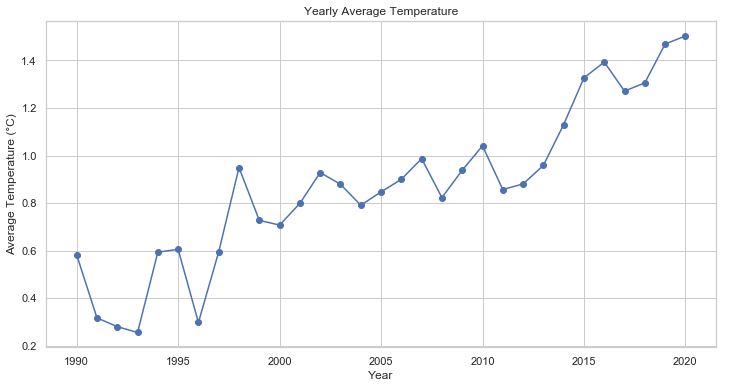

In [49]:
# Grouping data by 'Year' and calculating the average temperature per year
yearly_avg_temp = data.groupby('Year')['Average Temperature °C'].mean().reset_index()

# Plotting the yearly average temperature
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_temp['Year'], yearly_avg_temp['Average Temperature °C'], marker='o', color='b', linestyle='-')
plt.title("Yearly Average Temperature")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.show()


This line plot allow you to:

Observe temperature trends over the years.
Identify any significant temperature increases, which could be key in understanding the impacts of climate change on the agri-food sector.

## Plotting the top countries with highest average temperature

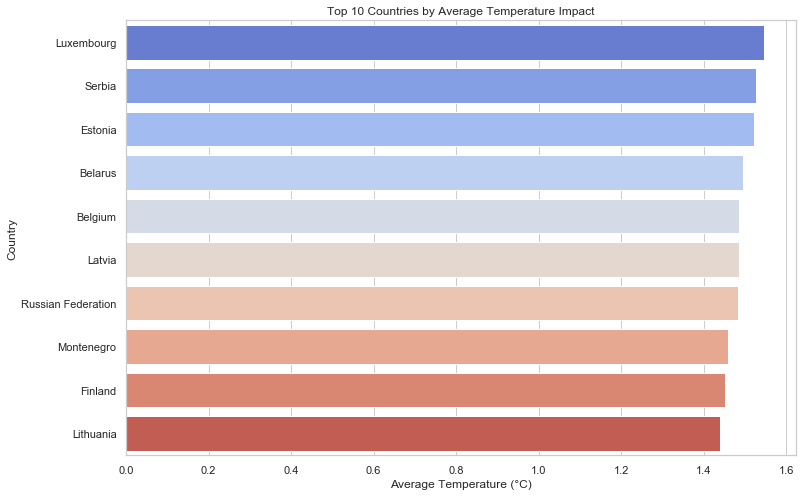

In [50]:
# Calculate the average temperature per country
country_avg_temp = data.groupby('Area')['Average Temperature °C'].mean().reset_index()

# Sort by temperature in descending order to get top impacted countries
top_countries = country_avg_temp.sort_values(by='Average Temperature °C', ascending=False).head(10)

# Plotting the top countries with highest average temperature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Average Temperature °C', y='Area', palette="coolwarm")
plt.title("Top 10 Countries by Average Temperature Impact")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Country")
plt.show()


This bar chart help:

Identify the top countries experiencing high average temperatures.
Support the focus of climate adaptation efforts in areas facing the most extreme temperature impacts.

## Plotting pie chart of population distribution in rural vs urban 

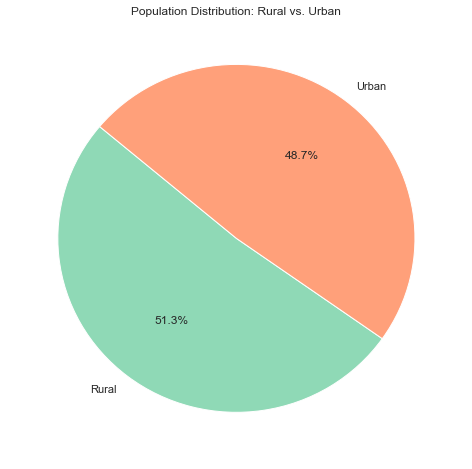

In [56]:
import matplotlib.pyplot as plt

# Calculate total population for rural and urban areas
total_rural_population = data['Rural population'].sum()
total_urban_population = data['Urban population'].sum()

# Create a dictionary for rural vs. urban population
population_distribution = {'Rural': total_rural_population, 'Urban': total_urban_population}

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(population_distribution.values(), labels=population_distribution.keys(), autopct='%1.1f%%', startangle=140, colors=["#8fd9b6", "#ffa07a"])
plt.title("Population Distribution: Rural vs. Urban")
plt.show()


This pie chart:

Illustrate the proportion of the population living in rural versus urban areas.
Support decisions around where to target climate adaptation efforts, as rural areas often face unique climate challenges, especially in agriculture.

## Load data for plotting LinearRegression, PolynomialFeatures , train_test_split

In [6]:
import pandas as pd

file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri_cleaned.csv"
data = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
data.head()


,Area,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Fertilizers Manufacturing,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,...,11.9970,1590.5319,0.0,0.0,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,...,12.8539,1657.2364,0.0,0.0,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,...,13.4929,1653.5068,0.0,0.0,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,...,14.0559,1642.9623,0.0,0.0,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,...,15.1269,1689.3593,0.0,0.0,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset (adjust path if necessary)
file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri_cleaned.csv"
data = pd.read_csv(file_path)

# Check the first few rows
print(data.head())

# Check for column names
print(data.columns)


          Area  Year  Savanna fires  Forest fires  Rice Cultivation  \
0  Afghanistan  1990        14.7237        0.0557            686.00   
1  Afghanistan  1991        14.7237        0.0557            678.16   
2  Afghanistan  1992        14.7237        0.0557            686.00   
3  Afghanistan  1993        14.7237        0.0557            686.00   
4  Afghanistan  1994        14.7237        0.0557            705.60   

   Drained organic soils (CO2)  Pesticides Manufacturing  Food Transport  \
0                          0.0                 11.807483         63.1152   
1                          0.0                 11.712073         61.2125   
2                          0.0                 11.712073         53.3170   
3                          0.0                 11.712073         54.3617   
4                          0.0                 11.712073         53.9874   

   Forestland  Net Forest conversion           ...            \
0   -2388.803                    0.0           ...  

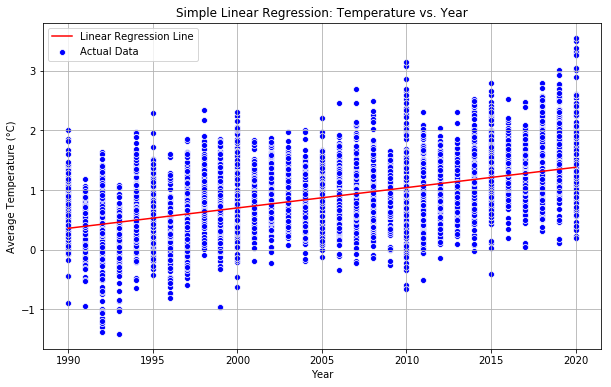

In [9]:
# Prepare the data
X = data[['Year']]
y = data['Average Temperature °C']

# Train the model
model_simple = LinearRegression()
model_simple.fit(X, y)

# Predict and visualize
y_pred_simple = model_simple.predict(X)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Average Temperature °C', data=data, color="blue", label="Actual Data")
plt.plot(data['Year'], y_pred_simple, color="red", label="Linear Regression Line")
plt.title('Simple Linear Regression: Temperature vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


This scatter plot showing the relationship between the year and the average temperature (in °C). Here's a breakdown of what you can expect from the plot:

Scatterplot of Actual Data: The blue points represent the actual recorded average temperatures for each year, giving a visual distribution of temperature changes over time.

Regression Line: The red line represents the linear regression model's prediction, showcasing the trend of how average temperature has changed over the years. This line helps indicate whether there is an overall increase or decrease in temperature across the time span.

Trend Analysis: If the red line slopes upward, it implies an increasing trend in average temperatures over the years, suggesting potential warming over the analyzed period. Conversely, if it slopes downward, it indicates a cooling trend.

Model Fit: The closeness of the data points to the red line provides insight into how well the model fits the data. Points close to the line suggest a good fit, while widely scattered points indicate more variability and potentially less predictive accuracy.

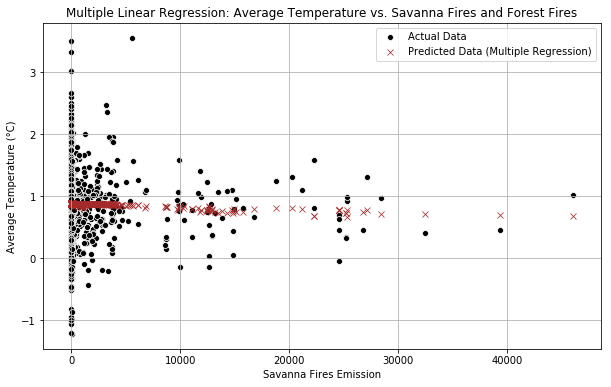

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset (update the path if necessary)
file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri_cleaned.csv"
data = pd.read_csv(file_path)

# Prepare the data using 'Savanna fires' and 'Forest fires' as predictors
X = data[['Savanna fires', 'Forest fires']]  # Ensure the column names are correct
y = data['Average Temperature °C']           # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Savanna fires'], y=y_test, color="black", label="Actual Data")
sns.scatterplot(x=X_test['Savanna fires'], y=y_pred, color="brown", marker='x', label="Predicted Data (Multiple Regression)")
plt.title('Multiple Linear Regression: Average Temperature vs. Savanna Fires and Forest Fires')
plt.xlabel('Savanna Fires Emission')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


This visuals illustrate the relationship between "Savanna fires" emissions and the "Average Temperature (°C)," focusing on both actual and predicted data points. Here's a breakdown of what this plot would communicate:

Scatterplot of Actual Data: The black points represent the true observed data from the test set, showing how average temperature varies with "Savanna fires" emissions.

Predicted Data Points: The brown "x" markers illustrate the predicted average temperatures from the multiple linear regression model based on the emissions from "Savanna fires" and "Forest fires" as predictors. These predictions give an idea of how well the model captures the relationship between these emissions and temperature.

Trend Analysis: By comparing the actual data points to the predicted ones, you can assess how closely the model's predictions match reality. If the brown "x" markers align closely with the black points, it indicates the model is accurately predicting average temperatures based on the input features. If there are significant discrepancies, it suggests the model may need adjustments or that the relationship is more complex.

Single Feature Focus: Although the model uses both "Savanna fires" and "Forest fires" as predictors, this plot only shows the relationship between the average temperature and "Savanna fires" emissions. It provides a focused view but doesn't capture the full multidimensional relationship.

Insights: If the predicted data points are scattered around the actual data without a systematic deviation, it suggests the model is reasonably accurate. However, if there is a consistent bias (e.g., predictions are mostly above or below actual data), it might indicate an underfitting or overfitting issue or potential need for more complex modeling.

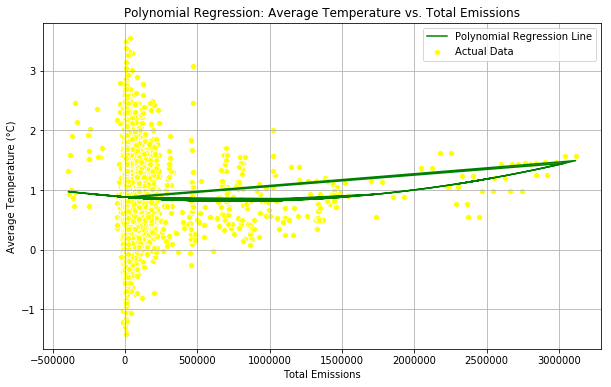

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Load the dataset (update path if necessary)
file_path = "C:/Users/f8871629/Downloads/co2_emissions_from_agri_cleaned.csv"
data = pd.read_csv(file_path)

# Prepare the data
X = data[['total_emission']]  # Only total emissions as predictor
y = data['Average Temperature °C']  # Target variable

# Create polynomial features (degree 2 for quadratic relationship; adjust if needed)
poly = PolynomialFeatures(degree=2)  # Try degree=2, can also experiment with higher degrees
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Train the Polynomial Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Visualize the results
# For a smoother line, generate predictions on the full range of total emissions
X_full = poly.fit_transform(X)  # Transform the entire dataset for plotting
y_full_pred = model.predict(X_full)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['total_emission'], y=data['Average Temperature °C'], color="yellow", label="Actual Data")
plt.plot(data['total_emission'], y_full_pred, color="green", label="Polynomial Regression Line")
plt.title('Polynomial Regression: Average Temperature vs. Total Emissions')
plt.xlabel('Total Emissions')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


This polynomial regression analysis illustrating the relationship between "Total Emissions" and "Average Temperature (°C)." Here's a summary of the plot and its key features:

Scatterplot of Actual Data: The yellow points represent the real observations from the dataset, showing how average temperature varies with total emissions. This provides a direct look at the spread and trend of the actual data.

Polynomial Regression Line: The green line shows the polynomial regression model's fitted curve. Since this is a degree-2 (quadratic) polynomial, the line is curved, which allows for capturing non-linear relationships between total emissions and temperature.

Trend Analysis:

Curve Interpretation: The shape of the curve indicates whether there is a non-linear relationship between emissions and temperature. For instance, if the curve rises more steeply as emissions increase, it suggests that higher emissions may correlate with a sharper increase in temperature.
Model Fit: If the curve aligns well with the yellow points, it indicates that the polynomial model fits the data effectively. Any visible deviations might imply areas where the model struggles to accurately predict temperature changes.
Insights:

Non-Linear Relationship: The polynomial regression can reveal subtleties in the data that a linear model might miss, such as acceleration or deceleration in temperature change with increasing emissions.
Prediction Strength: This visual can show if a quadratic model is sufficient or if a higher-degree polynomial might better capture the relationship (though higher degrees may risk overfitting).
General Observations:

If the data points are mostly near the polynomial curve, the model is performing well.
Large discrepancies between actual and predicted data could suggest that other variables or more complex modeling techniques are needed to capture the dynamics between emissions and temperature.